In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:44:36,781 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:36,783 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:36,784 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:36,804 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:44:36,804 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:36,863 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:44:37,495 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:37,498 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:37,499 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:37,499 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:37,500 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:37,500 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:37,501 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:37,502 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:38,218 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:44:38,453 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:38,457 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:38,458 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:38,462 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:39,462 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 8
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136333790899, 864691136008573614, 864691135974454639,
       864691135393964789, 864691135233108569])


--- Working on Neuron 864691136333790899 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 215, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3857, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4072
n_valid_syn_ids_presyn = 215
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3857
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136333790899
Postsyn counts:
TP:3856
TN:0
FP:1
FN:0
Presyn counts:
TP:95
TN:0
FP:120
FN:0


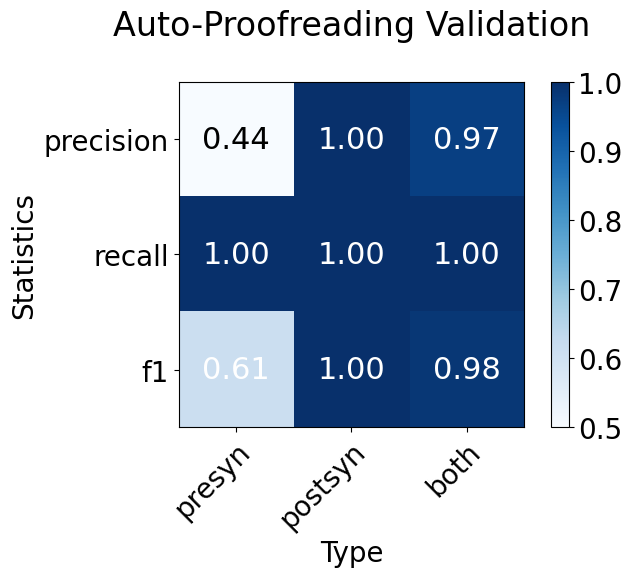

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136333790899_validation_df.pbz2
File size is 0.083155 MB
Total time for neuron 864691136333790899: 143.42314863204956

--- Working on Neuron 864691136008573614 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 172, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 9840, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 172
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 9840
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136008573614
Postsyn counts:
TP:9835
TN:0
FP:5
FN:0
Presyn counts:
TP:100
TN:0
FP:72
FN:0


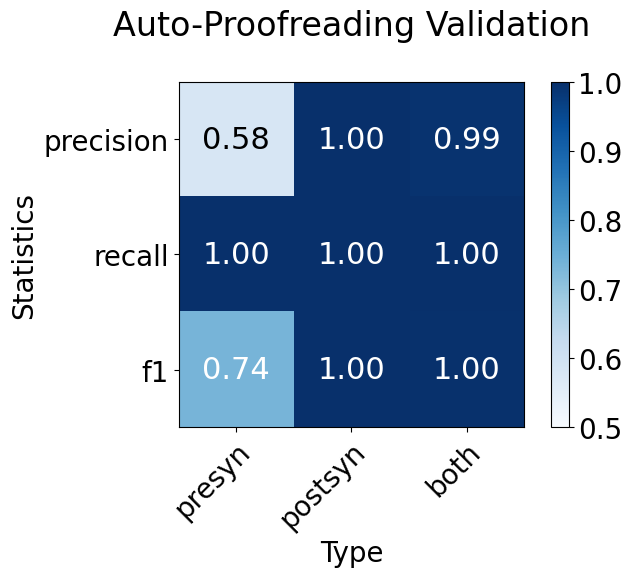

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136008573614_validation_df.pbz2
File size is 0.19453 MB
Total time for neuron 864691136008573614: 179.3427472114563

--- Working on Neuron 864691135974454639 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 123, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1773, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1896
n_valid_syn_ids_presyn = 123
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1773
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135974454639
Postsyn counts:
TP:1764
TN:0
FP:9
FN:0
Presyn counts:
TP:5
TN:0
FP:118
FN:0


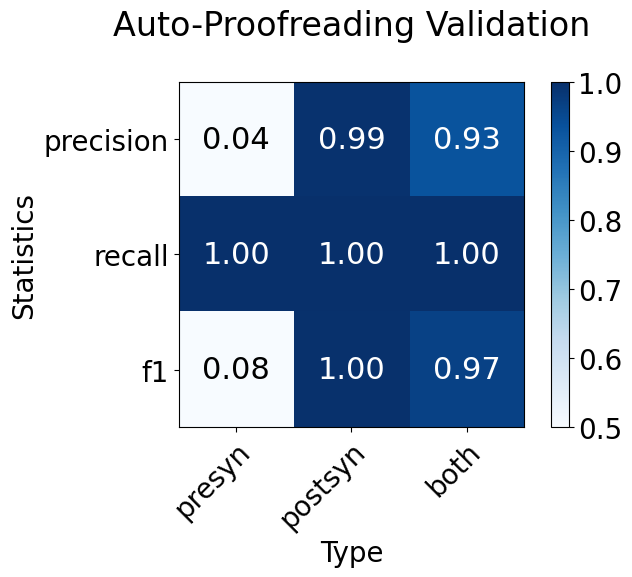

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135974454639_validation_df.pbz2
File size is 0.039325 MB
Total time for neuron 864691135974454639: 31.365760326385498

--- Working on Neuron 864691135393964789 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 215, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1699, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 215
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1699
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135393964789
Postsyn counts:
TP:1592
TN:0
FP:107
FN:0
Presyn counts:
TP:14
TN:0
FP:201
FN:0


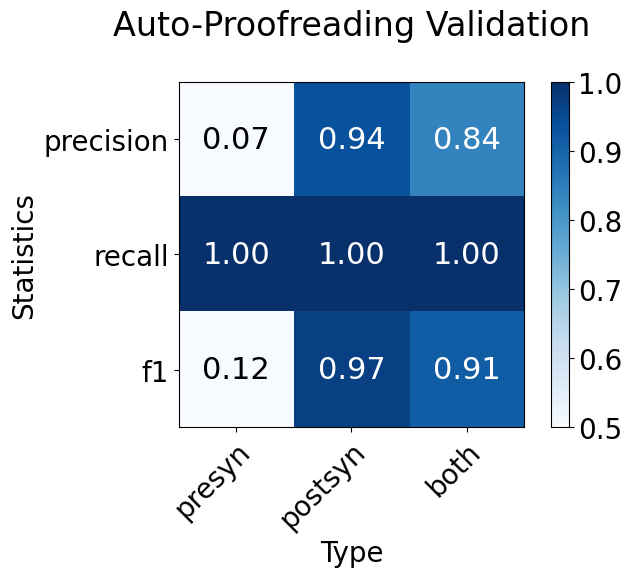

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135393964789_validation_df.pbz2
File size is 0.039154 MB
Total time for neuron 864691135393964789: 82.29606032371521

--- Working on Neuron 864691135233108569 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 59, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 733, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 792
n_valid_syn_ids_presyn = 59
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 733
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135233108569
Postsyn counts:
TP:731
TN:0
FP:2
FN:0
Presyn counts:
TP:12
TN:0
FP:47
FN:0


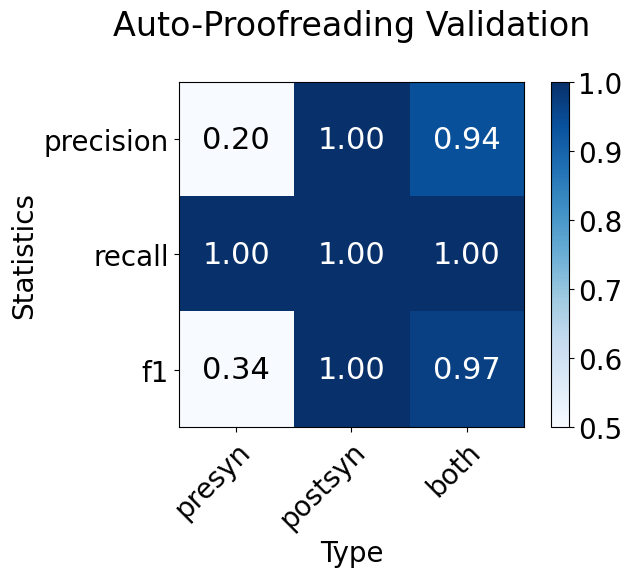

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135233108569_validation_df.pbz2
File size is 0.017455 MB
Total time for neuron 864691135233108569: 20.502554178237915


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")